In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os
import random
%matplotlib inline

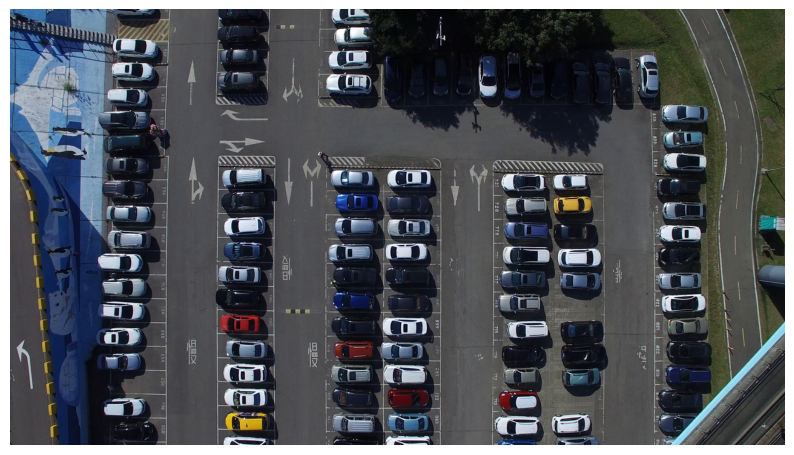

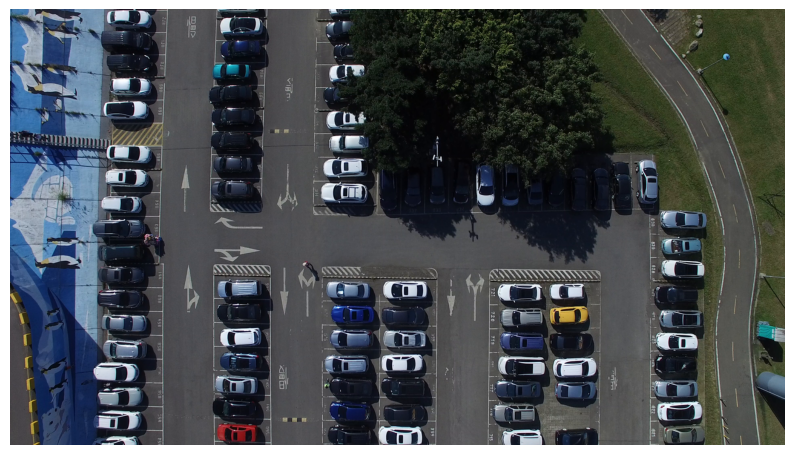

In [2]:
# Loading from folder
def load_images_from_folder(folder_path):
    filenames = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path)]
    raw_images = [cv2.imread(filename) for filename in filenames if filename.endswith(('.png', '.jpg', '.jpeg'))]
    return raw_images

folder_path = 'test_carpk'  

#loading images
raw_images = load_images_from_folder(folder_path)
for i in raw_images[187:189]:
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

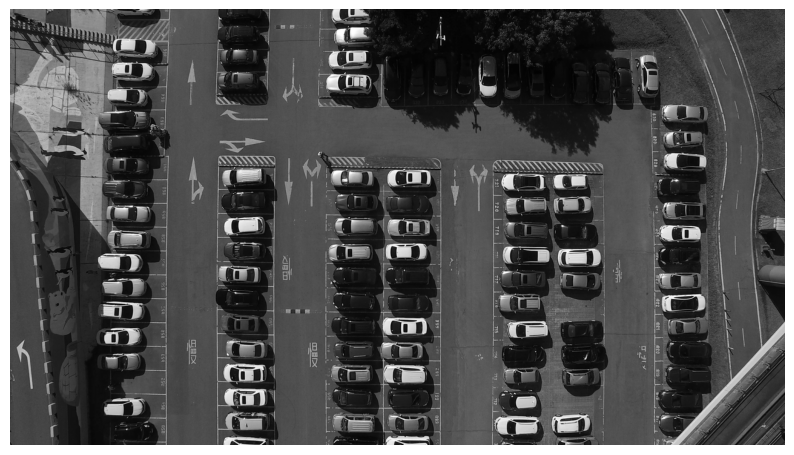

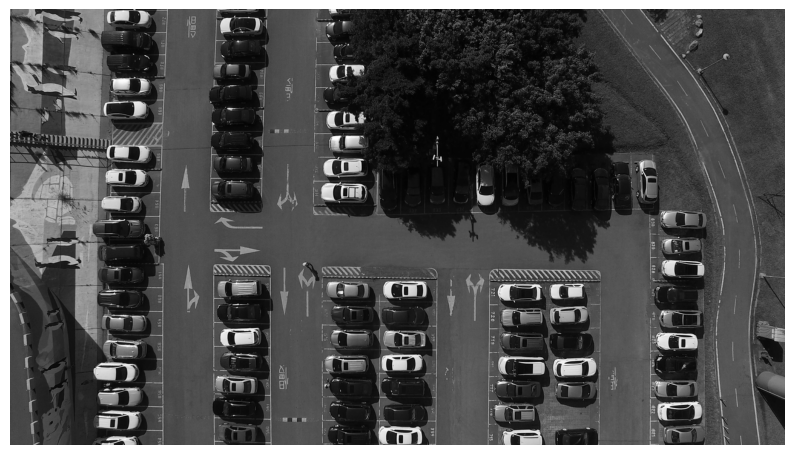

In [3]:
#Grayscaling
def convert_to_grayscale(images):
    grayscale_images = [cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in images]
    return grayscale_images

grayscale_images = convert_to_grayscale(raw_images)
for i in grayscale_images[187:189]:
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

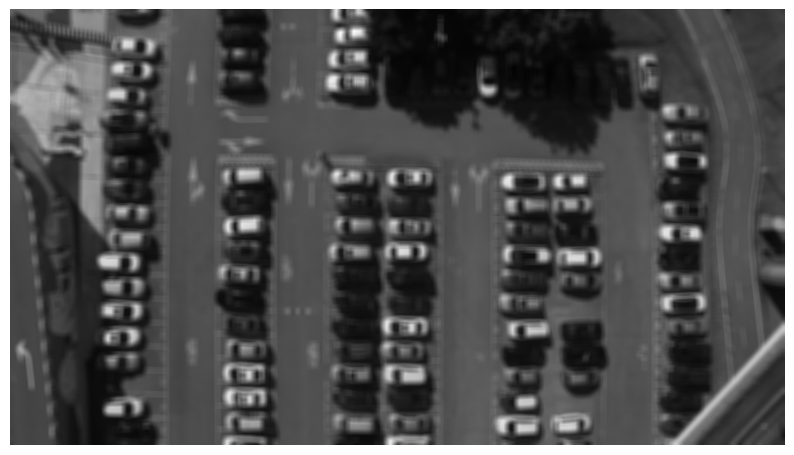

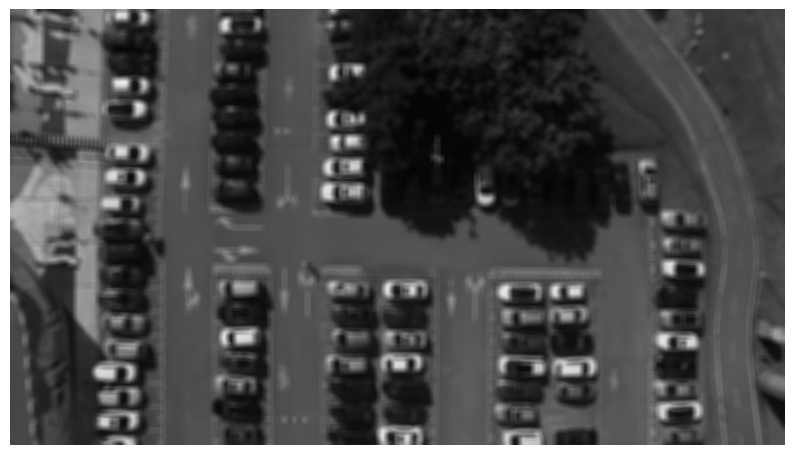

In [4]:
#Gaussian Blur
def apply_blur(images, kernel_size=(11, 11)):
    blurred_images = [cv2.blur(img, kernel_size) for img in images]
    return blurred_images

blur_images = apply_blur(grayscale_images)
for i in blur_images[187:189]:
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

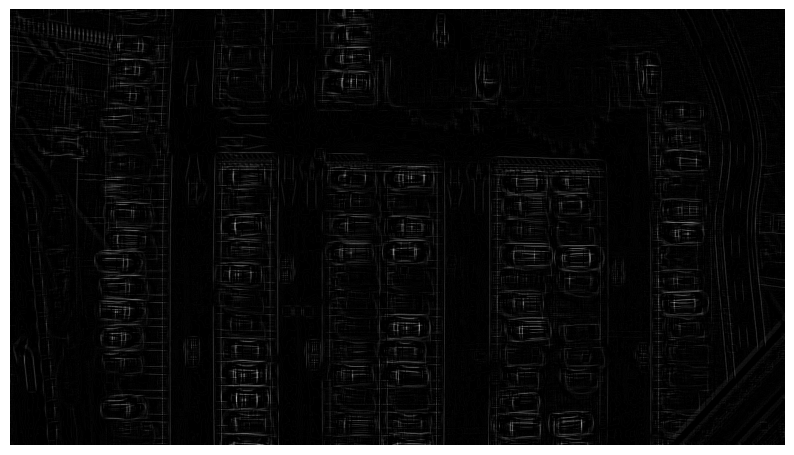

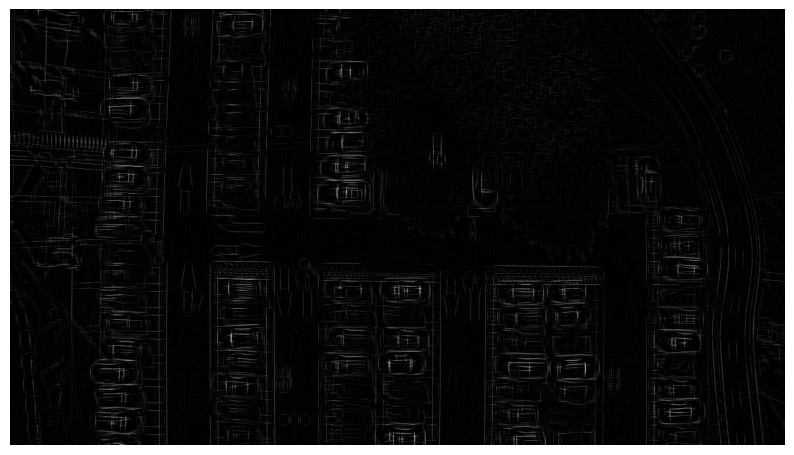

In [5]:
#Laplacian Filtering
def apply_laplacian(images, kernel_size=3):
    ddepth = cv2.CV_8UC1
    laplacian_images = [cv2.convertScaleAbs(cv2.Laplacian(img, ddepth, ksize=kernel_size)) for img in images]
    return laplacian_images

laplacian_images = apply_laplacian(blur_images)
for i in laplacian_images[187:189]:
    plt.figure(figsize=(10, 10))
    plt.imshow(i, cmap="gray")
    plt.axis("off")
    plt.show()


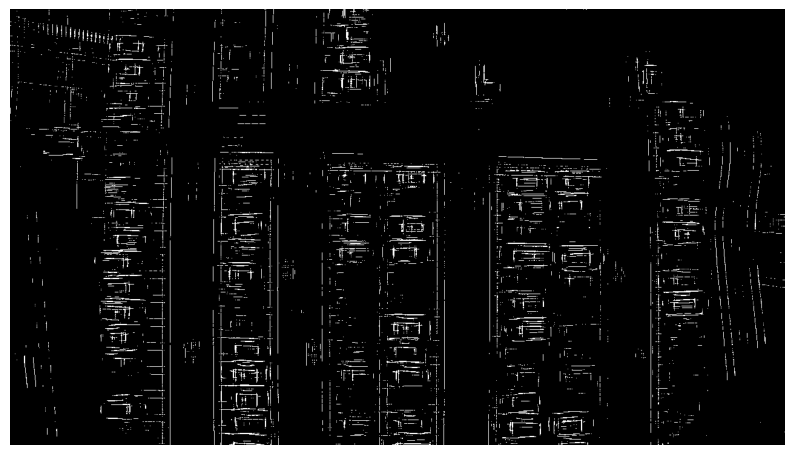

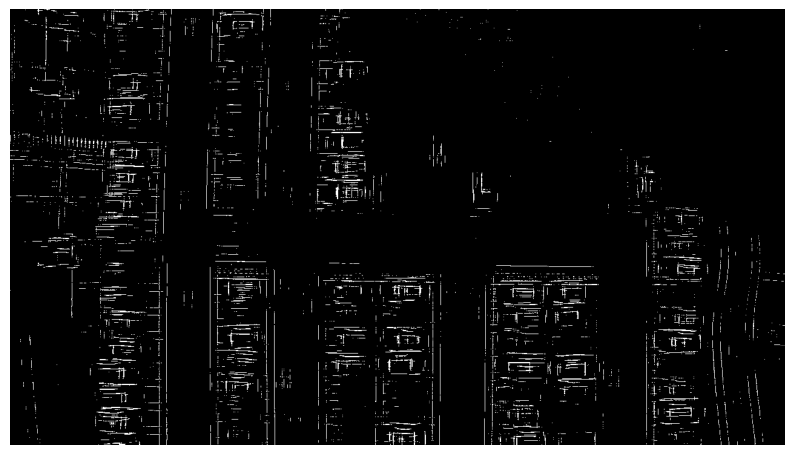

In [6]:
#Thresholding
def apply_threshold(images, threshold=20):  #Default threshold=254
    #threshold = 150  #Alternate threshold value
    binary_images = [cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)[1] for img in images]
    return binary_images

binary_images = apply_threshold(laplacian_images)
for i in binary_images[187:189]:
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

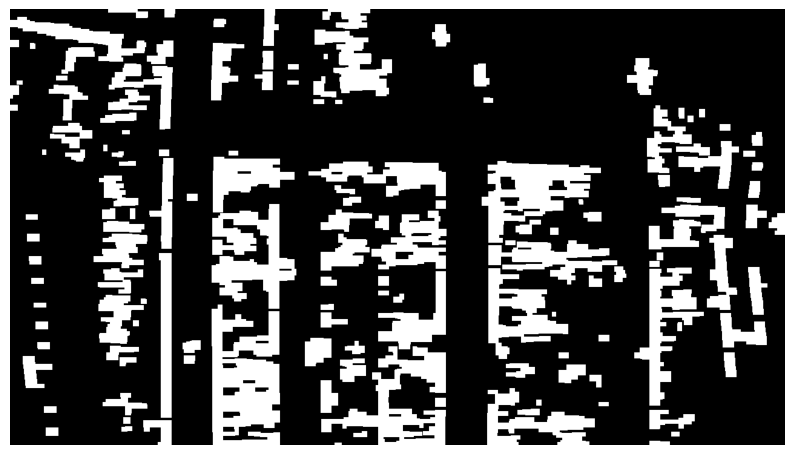

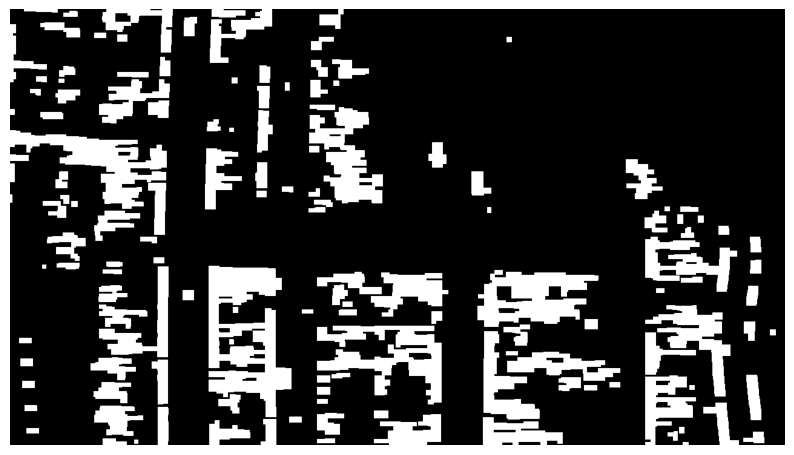

In [7]:
#Morphology (Erosion and Dilation)
def apply_morphology(images, kernel_size=(21, 7)):  #Default kernel_size=(21, 7)
    #kernel_size = (25, 25)  #Alternate kernel size
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)
    morphed_images = []
    for img in images:
        closed = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
        eroded = cv2.erode(closed, None, iterations=1)
        dilated = cv2.dilate(eroded, None, iterations=3)
        morphed_images.append(dilated)
    return morphed_images

morphed_images = apply_morphology(binary_images)
for i in morphed_images[187:189]:
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

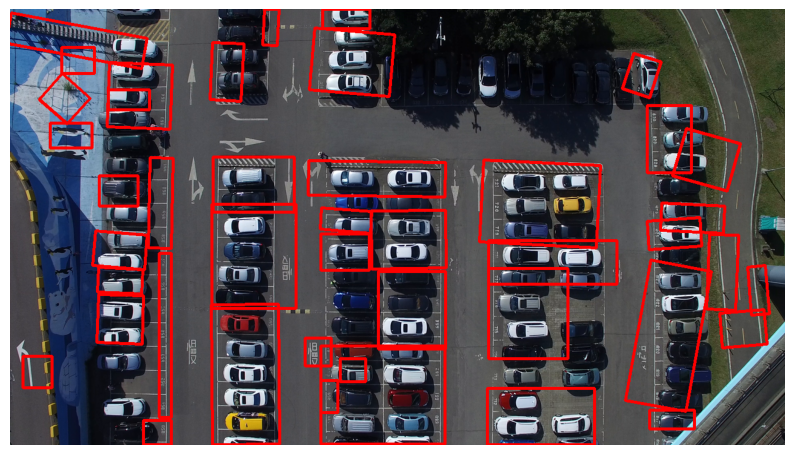

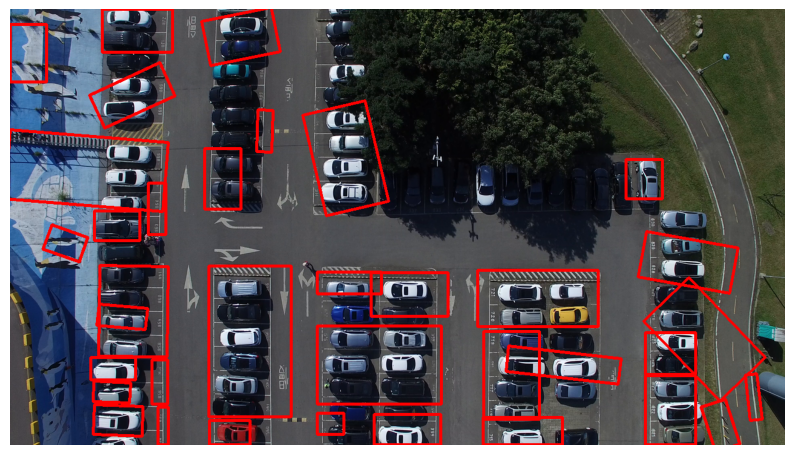

In [8]:
#Detecting and Drawing Contours
def detect_and_draw_multiple_contours(original_images, processed_images, min_area=1000):
    #min_area = 4000  #Alternate min_area
    marked_images = []
    for original, processed in zip(original_images, processed_images):
        contours, _ = cv2.findContours(processed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        marked_image = original.copy()
        for contour in contours:
            if cv2.contourArea(contour) > min_area:
                rotated_box = cv2.minAreaRect(contour)
                box_points = cv2.boxPoints(rotated_box)
                box_points = np.int32(box_points)
                cv2.drawContours(marked_image, [box_points], -1, (0, 0, 255), 3)  # Red for bounding boxes
        marked_images.append(marked_image)
    return marked_images

final_images = detect_and_draw_multiple_contours(raw_images, morphed_images)
for i in final_images[187:189]:
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

In [9]:
#saving
output_folder = "classical_output_carpk"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for idx, img in enumerate(final_images):
    save_path = os.path.join(output_folder, f"final_carpk_image_{idx+1}.jpg")
    cv2.imwrite(save_path, img)